In [2]:
using QuantumOptics
using PyPlot
using SplitApplyCombine

__Jaynes-Cummings model__

$H_C = \hbar \omega_{c}\hat{a}^\dagger \hat{a}$ - cavity hamiltonian



$H_A = \hbar \omega_a \frac{\hat{\sigma}_{z}}{2}$ - atom hamiltonian


$H_{AC} = \hbar \Omega (\hat{a}\hat{\sigma}_{+} + \hat{a}^\dagger  \hat{\sigma}_{-})$ - interaction hamiltonian with energy conserving terms

$H = H_{A} + H_{C} + H_{AC} =  \hbar \omega_{c}\hat{a}^\dagger \hat{a} + \hbar \omega_a \frac{\hat{\sigma}_{z}}{2}  + \hbar \Omega (\hat{a}\hat{\sigma}_{+} + \hat{a}^\dagger  \hat{\sigma}_{-})$




In [3]:
N = 100;

qb = SpinBasis(1//2);
cb = FockBasis(N);

In [4]:
a⁺ = create(cb);
a = destroy(cb);

σ⁻ = sigmam(qb);
σ⁺ = sigmap(qb);
σz = sigmaz(qb);

idc = one(cb);
idq = one(qb);

ee = σ⁺*σ⁻;
gg = σ⁻*σ⁺;

In [5]:
ωq = 10.0 *2\pi;
ωc = 10.0 *2\pi;
Ω = 0.5 * 2π;

H0 = ωc*(a⁺*a) ⊗ idq + ωq/2.0 * idc ⊗ σz;
V = (a⁺ ⊗ σ⁻ + a ⊗ σ⁺);
H = H0 + Ω * V;

__Vacuum initial state__

In [6]:
tspan = [0.0:0.01:5.0;];
ψ0 = fockstate(cb, 0) ⊗ spinup(qb);

tout, ψ = timeevolution.schroedinger(tspan, ψ0, H);

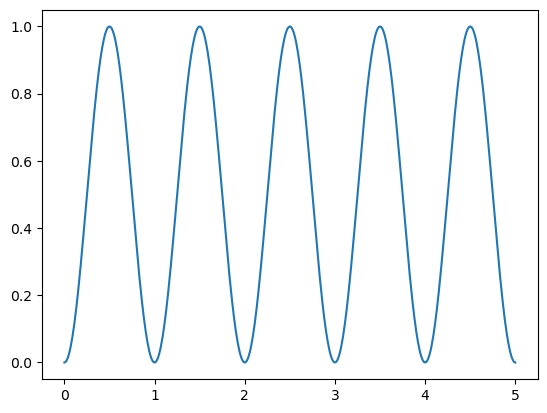

In [7]:
plot(tspan, real(expect(a⁺*a ⊗ idq, ψ)));

__Thermal state__

In [24]:
tspan = [0.0:0.01:15.0;];
T = 1.0;
ρ0 = thermalstate(H0,T);

tout, ρ1 = timeevolution.master(tspan, ρ0, H, []);
tout, ρ2 = timeevolution.master(tspan, ρ0, H, 0.01*J);

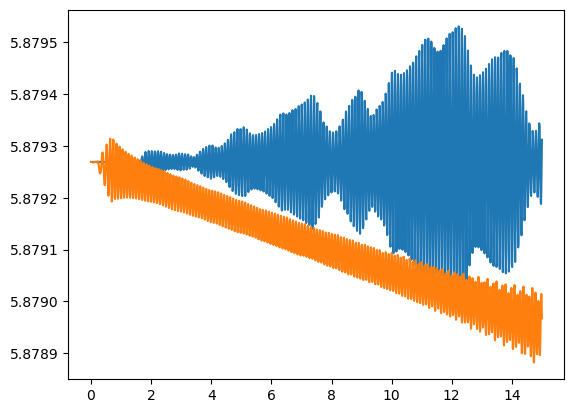

In [25]:
plot(tspan, real(expect(a⁺*a ⊗ idq, ρ1)));
plot(tspan, real(expect(a⁺*a ⊗ idq, ρ2)));

In [29]:
plot(tspan, e((σ⁺*σ⁻) ⊗ idc, ρ1));


LoadError: MethodError: no method matching expect(::Operator{CompositeBasis{Vector{Int64}, Tuple{SpinBasis{1//2, Int64}, FockBasis{Int64}}}, CompositeBasis{Vector{Int64}, Tuple{SpinBasis{1//2, Int64}, FockBasis{Int64}}}, SparseArrays.SparseMatrixCSC{ComplexF64, Int64}}, ::Operator{CompositeBasis{Vector{Int64}, Tuple{FockBasis{Int64}, SpinBasis{1//2, Int64}}}, CompositeBasis{Vector{Int64}, Tuple{FockBasis{Int64}, SpinBasis{1//2, Int64}}}, Matrix{ComplexF64}})
[0mClosest candidates are:
[0m  expect(::Any, ::AbstractOperator{B1, B2}, [91m::AbstractOperator{B3, B3}[39m) where {B1, B2, B3<:CompositeBasis} at ~/.julia/packages/QuantumInterface/yvpXN/src/expect_variance.jl:6
[0m  expect(::Any, ::AbstractOperator, [91m::Vector[39m) at ~/.julia/packages/QuantumInterface/yvpXN/src/expect_variance.jl:14
[0m  expect(::Any, ::AbstractOperator{B, B}, [91m::Ket{B2}[39m) where {B, B2<:CompositeBasis} at ~/.julia/packages/QuantumOpticsBase/l5btd/src/operators.jl:114
[0m  ...

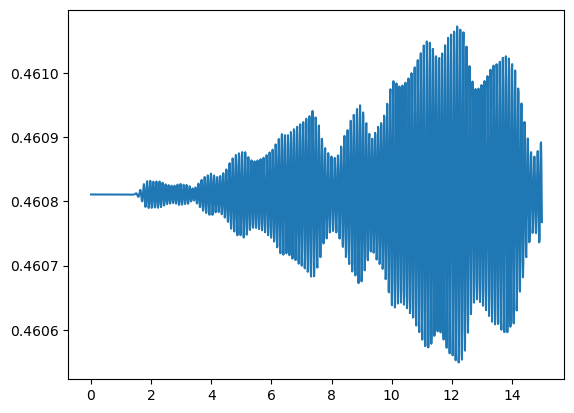

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x1ee4d92d0>

In [48]:
plot(tspan, real(expect(σ⁺*σ⁻, ptrace.(ρ1, 1))))

__Revivals__

/Users/goloshch/.julia/conda/3/x86_64/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


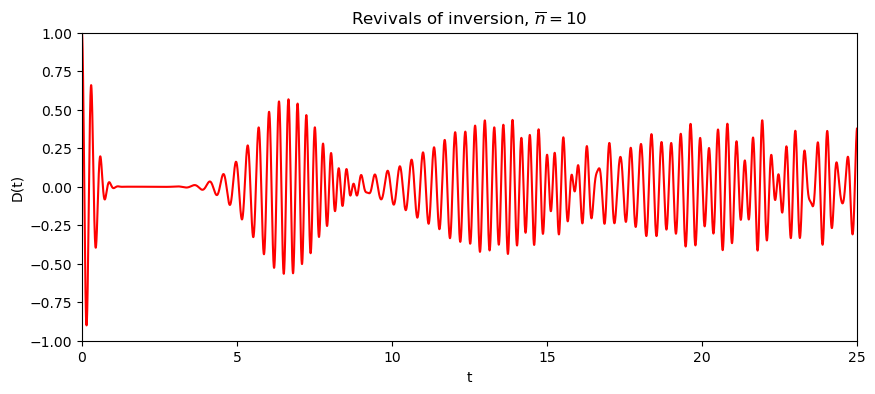

PyObject Text(0.5, 1.0, 'Revivals of inversion, $ \\overline{n}= 10$')

In [8]:
tspan = [0.0:0.001:50.0;];
ψ0 = coherentstate(cb, sqrt(10)) ⊗ (spinup(qb));

tout, ψ = timeevolution.schroedinger(tspan, ψ0, H);

figure(figsize=(10,4))
plot(tspan, expect(idc ⊗ ee, ψ)-expect(idc ⊗ gg, ψ), color="red")
ylim(-1.0,1.0)
xlim(0.0, 25.0)
xlabel("t")
ylabel("D(t)")
title("Revivals of inversion, \$ \\overline{n}= 10\$")

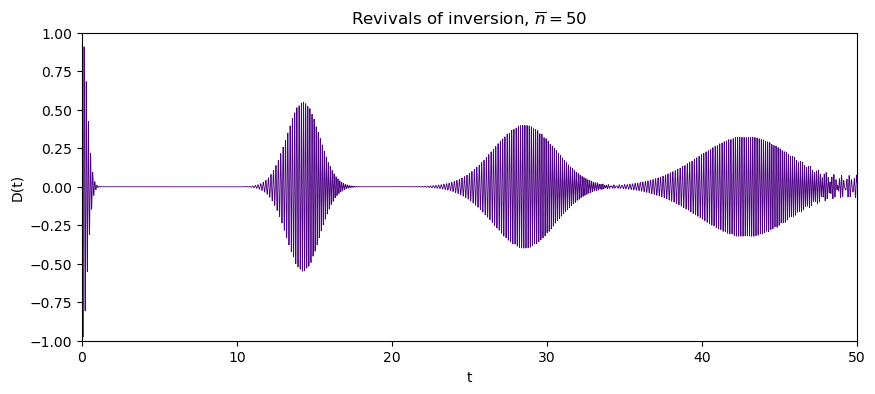

PyObject Text(0.5, 1.0, 'Revivals of inversion, $ \\overline{n}= 50$')

In [9]:
tspan = [0.0:0.01:150.0;];
ψ0 = coherentstate(cb, sqrt(50)) ⊗ (spinup(qb));
tout, ψ = timeevolution.schroedinger(tspan, ψ0, H);


figure(figsize=(10,4))
plot(tspan, expect(idc ⊗ ee, ψ)-expect(idc ⊗ gg, ψ), color="indigo",linewidth=0.6)
ylim(-1.0,1.0)
xlim(0.0, 50.0)
xlabel("t")
ylabel("D(t)")
title("Revivals of inversion, \$ \\overline{n}= 50\$")

__Coherent state + damping. Lossy cavity.__

$\partial_t\rho = \frac{1}{i \hbar}\left[H, \rho \right] + \gamma \left(J\rho J^\dagger - \frac{1}{2}J^\dagger J \rho - \frac{1}{2}\rho J^\dagger J\right)$,   $ J = \hat{\sigma}_{-}$

In [10]:
tspan = [0.0:0.01:20.0;];

γ = 0.5;
ψ0 = coherentstate(cb, sqrt(1)) ⊗ (spindown(qb));
ρ0 = ψ0 ⊗ dagger(ψ0);
J = [sqrt(γ)*idc ⊗ σ⁻];

tout, ρ = timeevolution.master(tspan, ρ0, H, J);

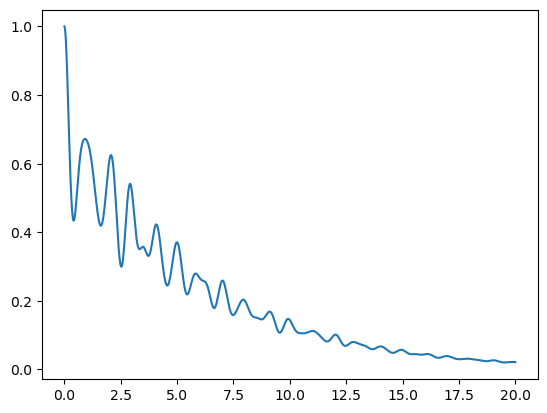

In [11]:
plot(tspan, real(expect(a⁺*a ⊗ idq, ρ)));

__Energy spectrum__

In [12]:
energies = [];


for Ω ∈ [0.0:0.001:0.2;]
    append!(energies, [eigenenergies(H0 + Ω*V, 50)]);
end;

[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this message.
[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this message.
[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this message.
[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this message.
[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this

[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this message.
[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this message.
[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this message.
[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this message.
[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this

[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this message.
[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this message.
[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this message.
[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this message.
[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this

[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this message.
[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this message.
[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this message.
[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this message.
[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this

[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this message.
[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this message.
[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this message.
[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this message.
[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this

[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this message.
[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this message.
[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this message.
[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this message.
[ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this

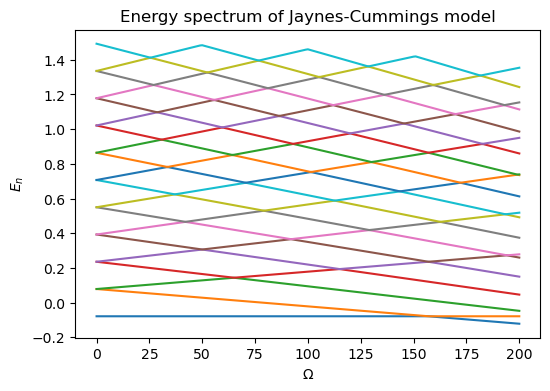

PyObject Text(0.5, 1.0, 'Energy spectrum of Jaynes-Cummings model')

In [13]:
figure(figsize=(6, 4))
for i ∈ 1:20
    plot([zip(energies...)...][i], linewidth=1.5)
end;

xlabel("Ω")
ylabel("\$ E_n \$")
title("Energy spectrum of Jaynes-Cummings model")